## Classificação de Exoplanetas
### Practical I - Machine Learning

#### Mírian Francielle

The goal of this practical is to practice the concepts studied during the module and to acquire experience in the use of some of the main classification methods, model evaluation and interpretation and presentation of experimental results. A comparison of multiple classification methods based on different principles in a binary classification problem regarding exoplanet candidates.

Task: Comparing six classification methods
- Naive Bayes
- Decision Tree
- SVM
- k-NN
- Random Forest
- Gradient Tree Boosting

In [82]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib as mpl
import matplotlib.style
import matplotlib.pyplot as plt

from IPython.display import display
from matplotlib import colors

from sklearn import svm
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors
from sklearn import feature_selection
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [36]:
#Input file path 
INPUT_FILEPATH = "koi_data.csv"
TARGET = "koi_disposition"
N_FEATURES = 41

#K-Folds cross-validator
N_FOLDS = 5

# Validation size
VAL_SIZE = 0.2

In [46]:
df = pd.read_csv(INPUT_FILEPATH)
df = df.drop(["kepoi_name"], axis=1)

print("lines: {}".format(df.shape[0]))
print("rows: {}".format(df.shape[1]))
print("Missing data: {}".format(df.isnull().sum().sum()))

# list features
features = list(df.columns)
features.remove(TARGET)
print("Target: {}".format(TARGET))

print("\n InputFile:")
with pd.option_context("max_columns", 6):
    display(df.head(10))

lines: 5202
rows: 42
Missing data: 0
Target: koi_disposition

 InputFile:


,koi_disposition,koi_period,koi_impact,...,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,9.48804,0.146,...,0.080,0.310,0.320
1,CONFIRMED,54.41838,0.586,...,0.490,0.120,0.500
2,FALSE POSITIVE,1.73695,1.276,...,-0.257,0.099,0.276
3,CONFIRMED,2.52559,0.701,...,0.070,0.020,0.070
4,FALSE POSITIVE,7.36179,1.169,...,-4.537,7.713,8.948
5,CONFIRMED,16.06865,0.052,...,0.005,0.030,0.031
6,CONFIRMED,2.47061,0.818,...,0.015,-0.270,0.270
7,CONFIRMED,3.52250,0.631,...,-0.028,0.176,0.178
8,CONFIRMED,3.70921,0.051,...,0.160,-0.130,0.210
9,FALSE POSITIVE,11.52145,2.483,...,0.147,0.037,0.151


In [47]:
#All features
print("Features:", features)

Features: ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor', 'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra', 'koi_fwm_sdec', 'koi_fwm_srao', 'koi_fwm_sdeco', 'koi_fwm_prao', 'koi_fwm_pdeco', 'koi_dicco_mra', 'koi_dicco_mdec', 'koi_dicco_msky', 'koi_dikco_mra', 'koi_dikco_mdec', 'koi_dikco_msky']


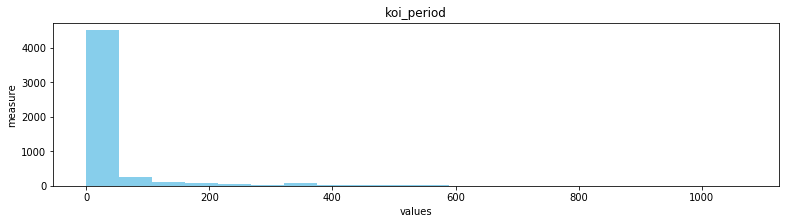

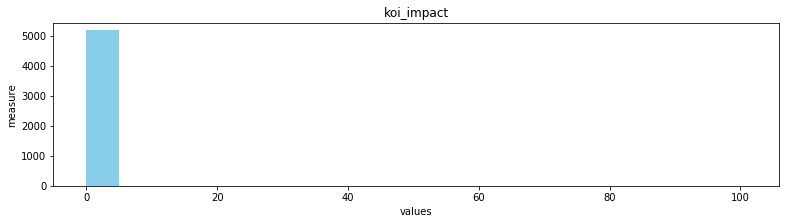

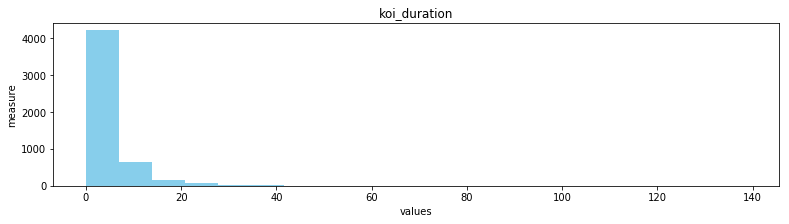

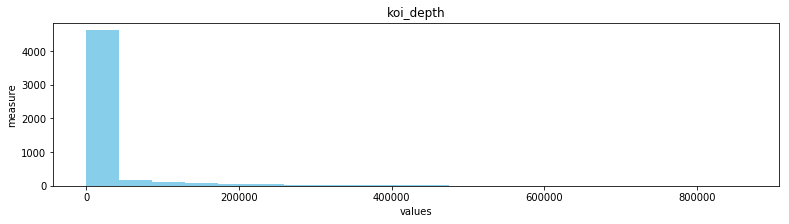

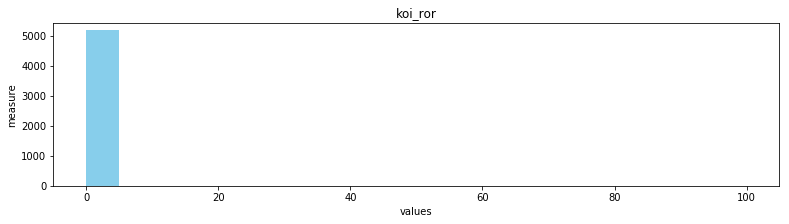

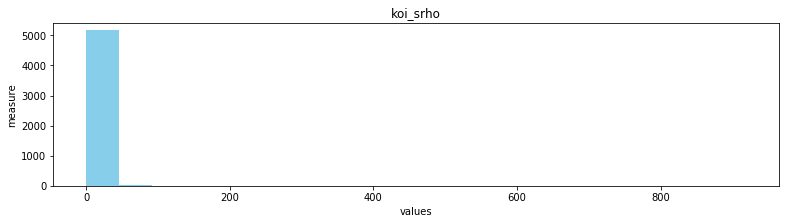

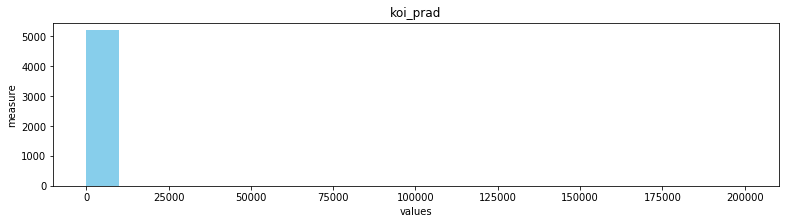

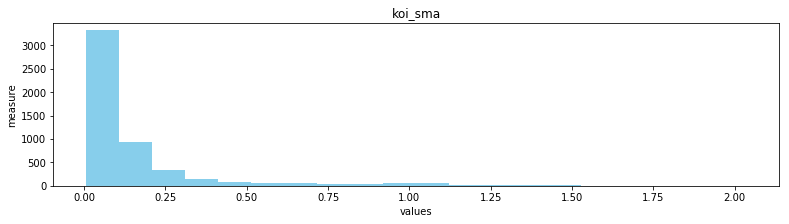

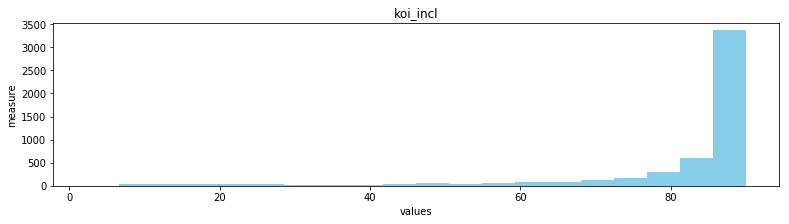

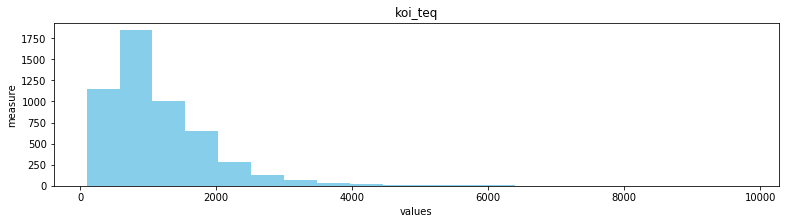

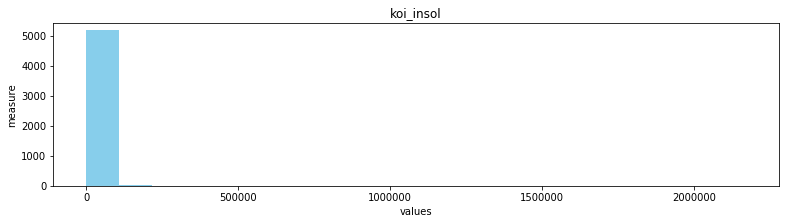

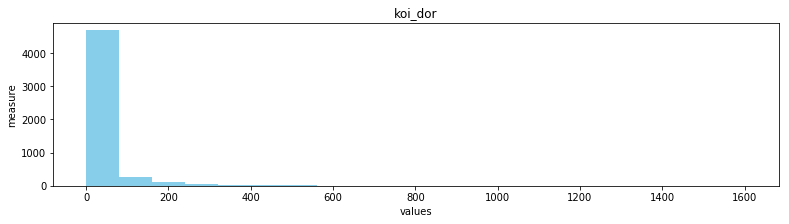

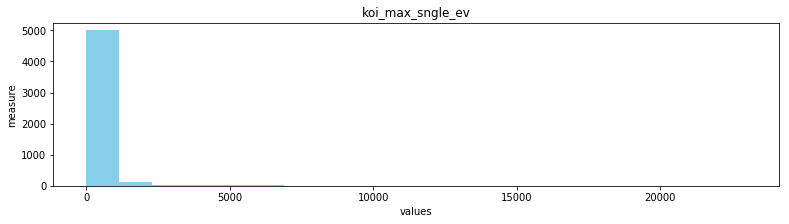

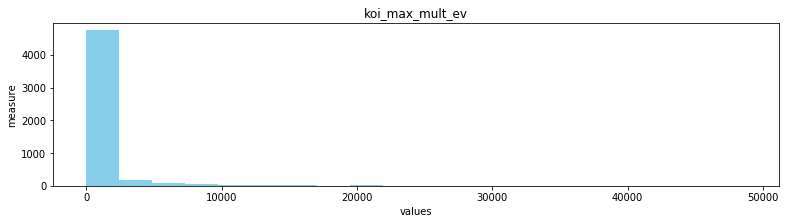

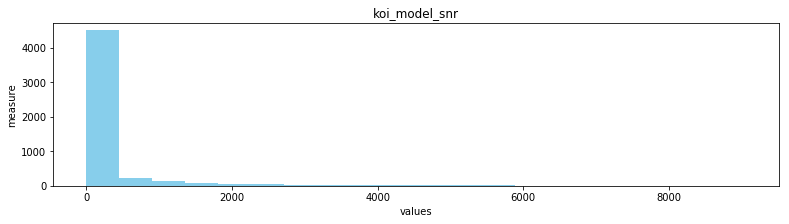

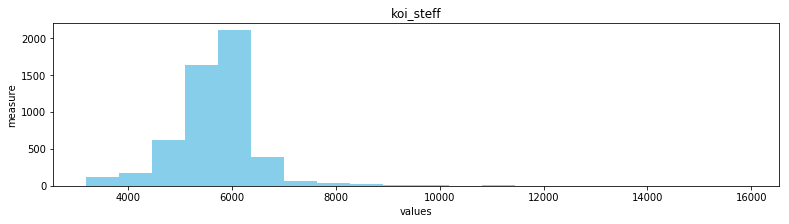

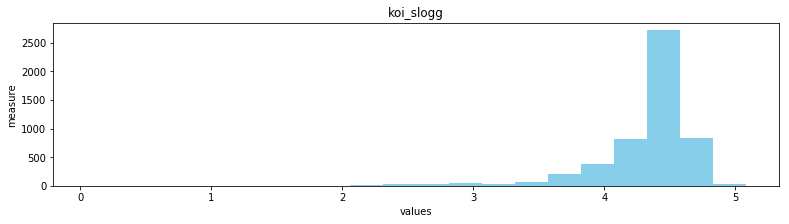

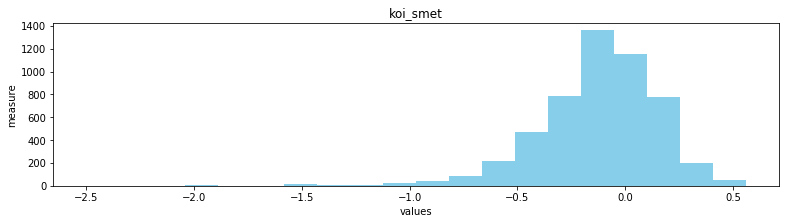

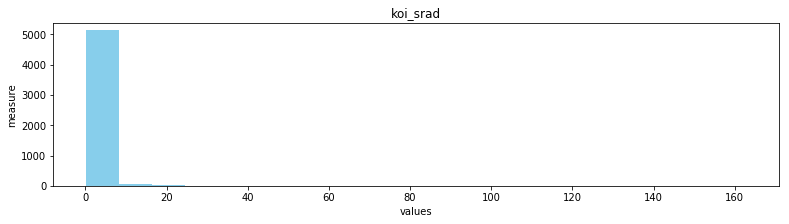

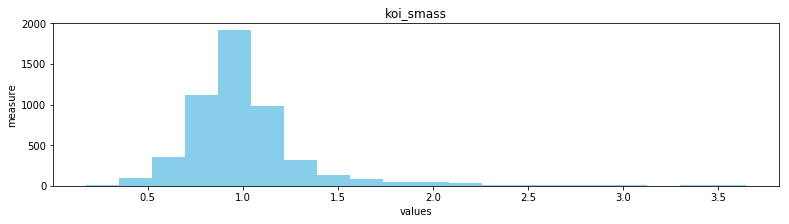

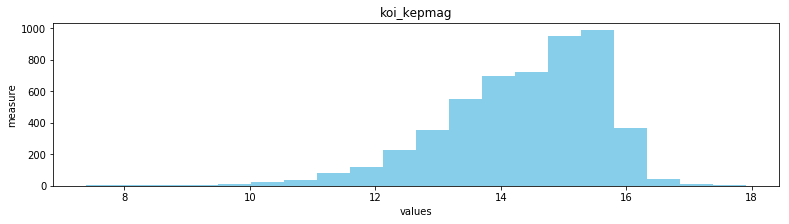

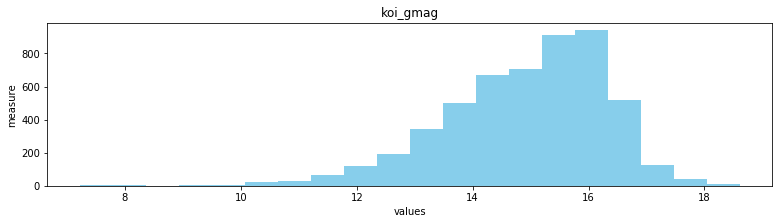

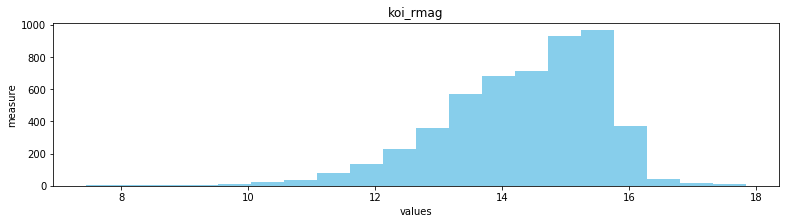

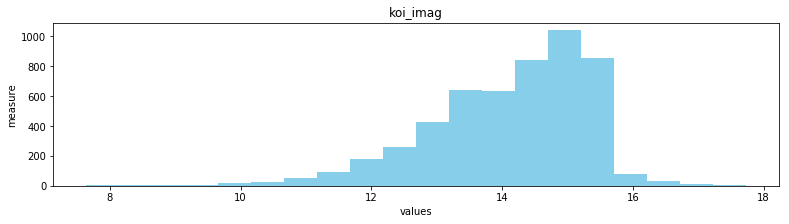

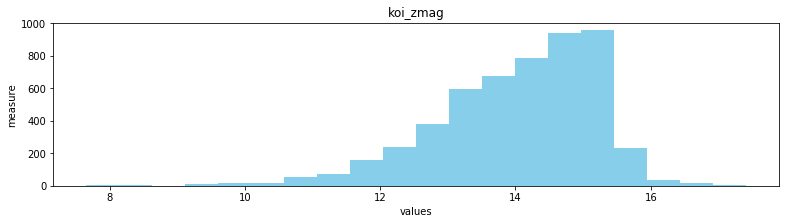

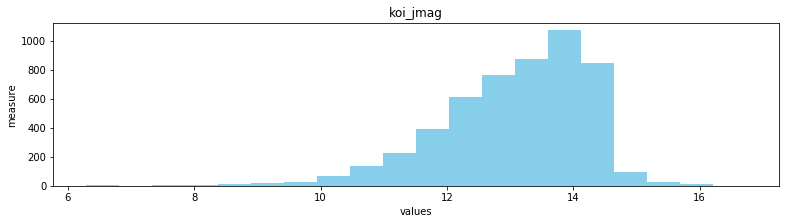

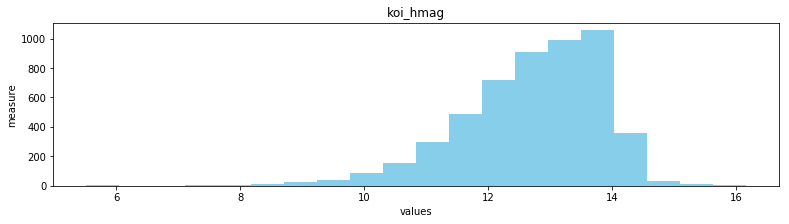

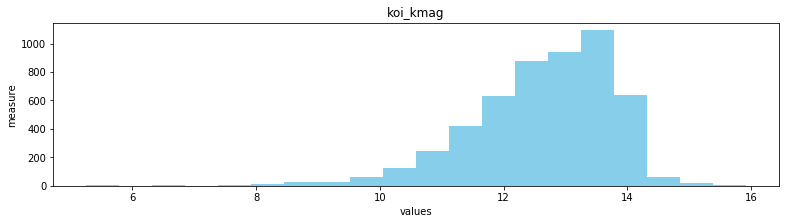

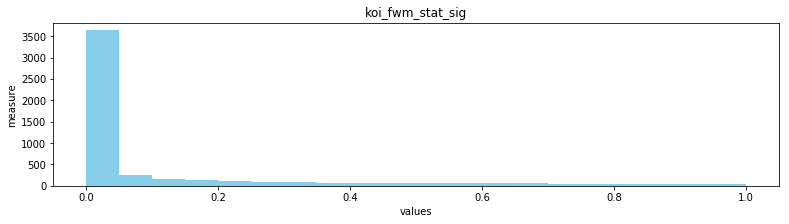

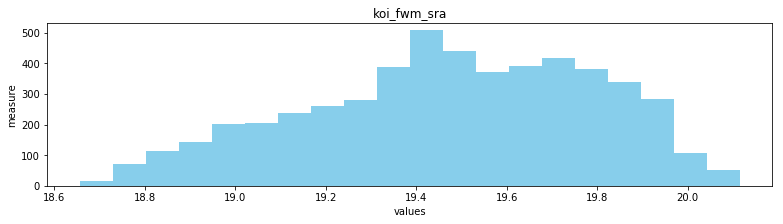

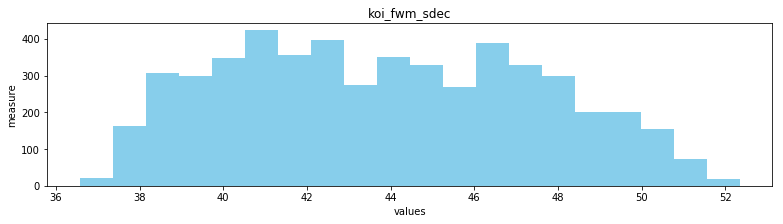

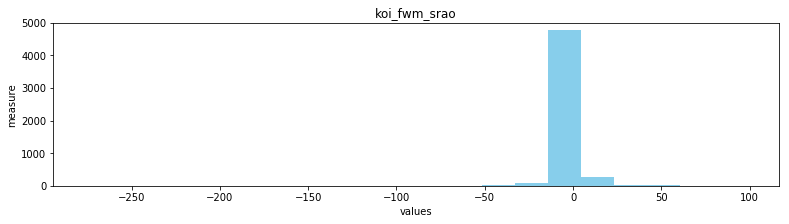

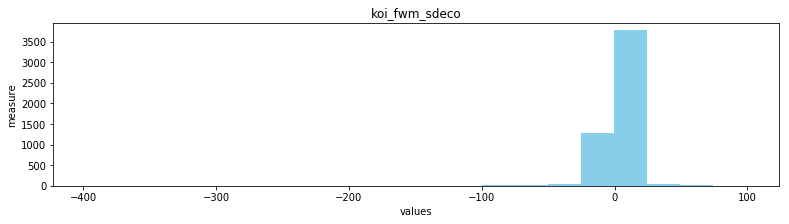

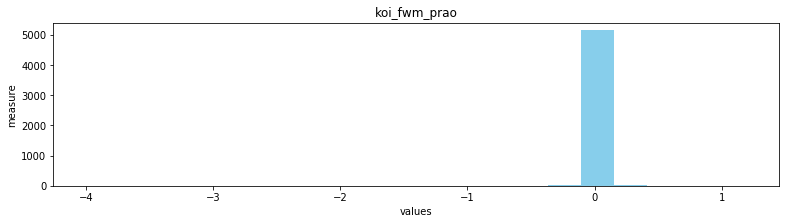

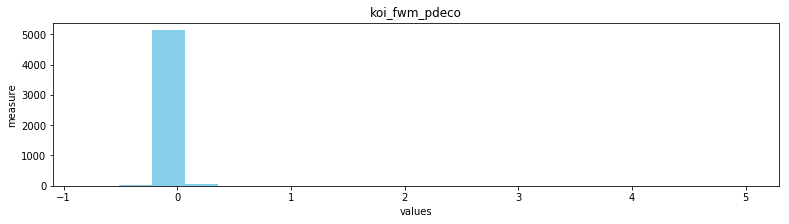

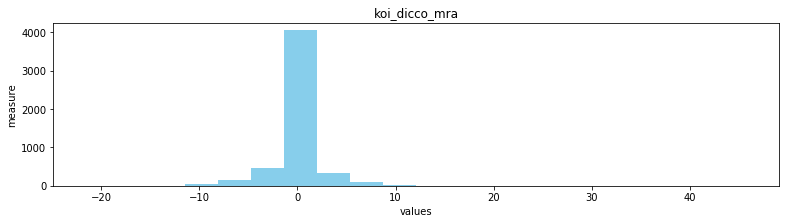

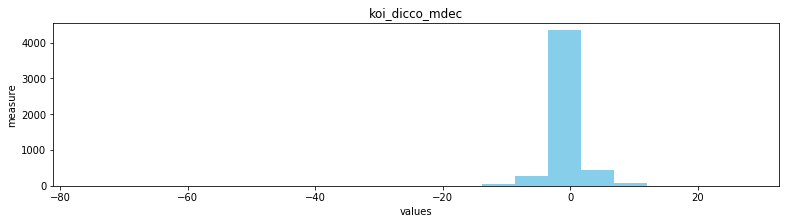

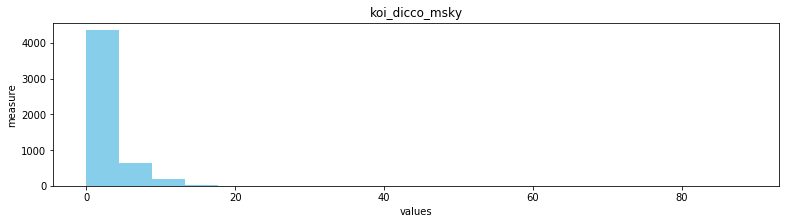

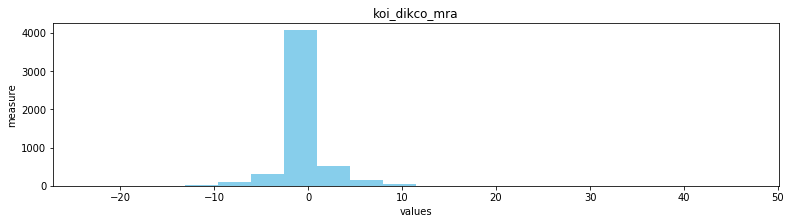

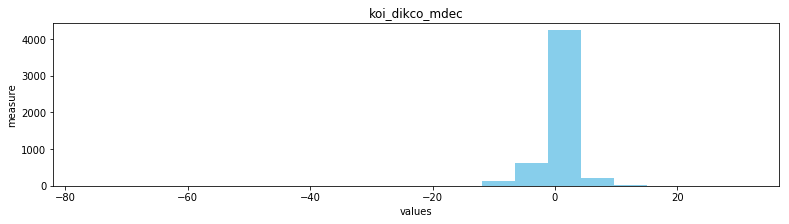

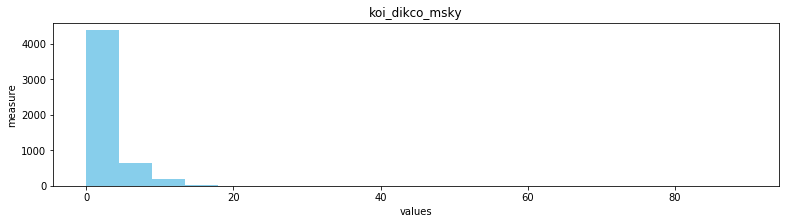

In [39]:
# Numeric datas 
for columns in features:
    plt.figure(figsize=(13, 3))
    plt.hist(df[columns], bins=20, color = "skyblue", lw=0)
    plt.title(columns)
    plt.xlabel("values")
    plt.ylabel("measure")
    plt.show()

In [48]:
#Target ratio
display((df[TARGET].value_counts()/len(df)*100).round(2).to_frame(TARGET +" (%)").T)

,FALSE POSITIVE,CONFIRMED
koi_disposition (%),59.55,40.45


#### Enconding

In [49]:
df[TARGET] = (df[TARGET] == "CONFIRMED").astype(int)
print("Results:")
display(df[[TARGET]].sample(5))

Results:


,koi_disposition
3020,0
904,1
3615,0
1185,1
77,1


In [50]:
# Enconding Target ratio
y = df[TARGET]
display((y.value_counts()/len(df)*100).round(2).to_frame(TARGET +" (%)").T)

print("\n InputFile:")
with pd.option_context("max_columns", 6):
    display(df.head(5))

,0,1
koi_disposition (%),59.55,40.45



 InputFile:


,koi_disposition,koi_period,koi_impact,...,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,9.48804,0.146,...,0.080,0.310,0.320
1,1,54.41838,0.586,...,0.490,0.120,0.500
2,0,1.73695,1.276,...,-0.257,0.099,0.276
3,1,2.52559,0.701,...,0.070,0.020,0.070
4,0,7.36179,1.169,...,-4.537,7.713,8.948


#### Normalization

In [51]:
# Recreates the list of features
features = list(df.columns)
features.remove(TARGET)

#Mean and Standard deviation
df[features] = df[features] - df[features].mean()
df[features] = df[features] / df[features].std()

print("Results:")
df_mean = df[features].mean().round(2).to_frame("Mean")
df_std = df[features].std().round(2).to_frame("Standard deviation")
with pd.option_context("max_rows", 10):
    display(df_mean.join(df_std))
    
df = df.drop(["koi_disposition"], axis=1)
print("\n dataFile:")
with pd.option_context("max_columns", 6):
    display(df.head(5))

Results:


,Mean,Standard deviation
koi_period,-0.0,1.0
koi_impact,-0.0,1.0
koi_duration,0.0,1.0
koi_depth,-0.0,1.0
koi_ror,-0.0,1.0
...,...,...
koi_dicco_mdec,0.0,1.0
koi_dicco_msky,-0.0,1.0
koi_dikco_mra,0.0,1.0
koi_dikco_mdec,0.0,1.0



 dataFile:


,koi_period,koi_impact,koi_duration,...,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,-0.311523,-0.217299,-0.380535,...,0.048032,0.149462,-0.509178
1,0.196636,-0.049884,-0.157990,...,0.214354,0.079985,-0.451904
2,-0.399187,0.212652,-0.459685,...,-0.088677,0.072306,-0.523178
3,-0.390267,-0.006128,-0.567677,...,0.043975,0.043418,-0.588726
4,-0.335570,0.171940,-0.084024,...,-1.824919,2.856491,2.236176


### K-Folds Cross Validation

In [52]:
def crossValidationScores(clf): 
    kfold = KFold(N_FOLDS, True, 1)
    scores = {}
    
    #metric scores
    mean_train_acc, mean_test_acc = 0, 0
    mean_train_recall, mean_test_recall = 0, 0
    mean_train_f1, mean_test_f1 = 0, 0
    mean_train_prec, mean_test_prec = 0, 0
    
    #train, test, validation
    x_train, y_train = [], []
    x_test, y_test = [], []
    x_val, y_val = [], []
    
    x_predict, y_predict, test_predict_prob = [], [], [] #prediction
    train_acc, test_acc, val_acc = [], [], [] #accuracy
    train_recall, test_recall, val_recall = [], [], [] #recall
    train_f1, test_f1, val_f1 = [], [], [] #f1
    train_prec, test_prec, val_prec = [], [], [] #precision
    
    # enumerate splits
    for train_index, test_index in kfold.split(df):
        x_train, x_test = df.iloc[train_index], df.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #classifier - fit train
        clf = clf.fit(x_train, y_train)
        
        #prediction
        x_predict, y_predict = clf.predict(x_train), clf.predict(x_test) 
        test_predict_prob = clf.predict_proba(x_test)
        
        train_acc.append(accuracy_score(y_train, x_predict))
        test_acc.append(accuracy_score(y_test, y_predict))
        
        train_recall.append(recall_score(y_train, x_predict))
        test_recall.append(recall_score(y_test, y_predict))
        
        train_f1.append(f1_score(y_train, x_predict))
        test_f1.append(f1_score(y_test, y_predict))
        
        train_prec.append(precision_score(y_train, x_predict))
        test_prec.append(precision_score(y_test, y_predict))

        mean_train_acc, mean_test_acc = np.mean(train_acc), np.mean(test_acc)
        mean_train_recall, mean_test_recall = np.mean(train_recall), np.mean(test_recall)
        mean_train_f1, mean_test_f1 = np.mean(train_f1), np.mean(test_f1)
        mean_train_prec, mean_test_prec = np.mean(train_prec), np.mean(test_prec)
        
        scores = {'train_acc':[] ,'test_acc':[] ,
                  'train_recall':[] ,'test_recall':[],
                  'train_f1':[],'test_f1':[],
                  'train_prec':[], 'test_prec':[]}
        
        scores['train_acc'].append(mean_train_acc)
        scores['test_acc'].append(mean_test_acc)
        scores['train_recall'].append(mean_train_recall)
        scores['test_recall'].append(mean_test_recall)
        scores['train_f1'].append(mean_train_f1)
        scores['test_f1'].append(mean_test_f1)
        scores['train_prec'].append(mean_train_prec)
        scores['test_prec'].append(mean_test_prec)

    return (scores)

In [53]:
def show_scores(scores = {}):
    print("Training:")
    print(" Accuracy: ", np.round(scores['train_acc'],4))
    print(" Recall: ", np.round(scores['train_recall'],4))
    print(" F1: ", np.round(scores['train_f1'],4))
    print(" Precision: ",np.round(scores['train_prec'],4))

    print("Test:")
    print(" Accuracy: ",np.round(scores['test_acc'],4))
    print(" Recall: ", np.round(scores['test_recall'],4))
    print(" F1: ", np.round(scores['test_f1'],4))
    print(" Precision: ", np.round(scores['test_prec'],4))

In [157]:
def show_plots(index, acc, recall, f1, prec, baseline, xlabel, title):
    
    fig, ax = plt.subplots()
    plt.axhline(baseline['test_acc'], linestyle='--', color='grey', label='baseline')
    ax.plot ( index, acc, linewidth = 1, color = 'red' , label='Accuracy')
    ax.plot ( index, recall, linewidth = 1, color = 'blue',label='Recall')
    ax.plot ( index, f1, linewidth = 1, color = 'green', label='F1')
    ax.plot ( index, prec, linewidth = 1, color = 'purple',label='Precision' )

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(index)
    ax.legend()
    plt.show()

### Naive Bayes

The Naive Bayes classifiers are a family of simple "probabilistic classifiers". We will use here as a baseline, a Gaussian curve for model classification.

In [149]:
#baseline 
gnb = GaussianNB()
baseline = crossValidationScores(gnb)

In [56]:
show_scores(baseline)

Training:
 Accuracy:  [0.9171]
 Recall:  [0.9732]
 F1:  [0.9047]
 Precision:  [0.8452]
Test:
 Accuracy:  [0.9175]
 Recall:  [0.9727]
 F1:  [0.9049]
 Precision:  [0.8459]


### Decision Tree

In a decision tree, a decision is made through the path from the root node to the leaf node. The variation in height/depth of the tree is decisive in the accuracy of the model. We can see that when it is unlimited, all metrics reach the maximum. We use here a tree of height 10, to evaluate the metrics and compare with an unlimited depth.

In [156]:
Accuracy_dt_test,Accuracy_dt_train = [],[]
Recall_dt_test,Recall_dt_train = [],[]
F1_dt_test,F1_dt_train = [],[]
Precision_dt_test,Precision_dt_train = [],[]

depth =  range(1,10+1)
for d in depth:
    dtc = DecisionTreeClassifier(max_depth = d)
    dtc_score = crossValidationScores(dtc)
    Accuracy_dt_test.append(dtc_score['test_acc'])
    Recall_dt_test.append(dtc_score['test_recall'])
    F1_dt_test.append(dtc_score['test_f1'])
    Precision_dt_test.append(dtc_score['test_prec'])
    
    Accuracy_dt_train.append(dtc_score['train_acc'])
    Recall_dt_train.append(dtc_score['train_recall'])
    F1_dt_train.append(dtc_score['train_f1'])
    Precision_dt_train.append(dtc_score['train_prec'])

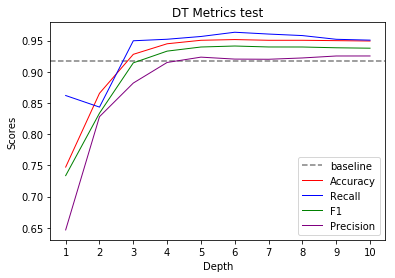

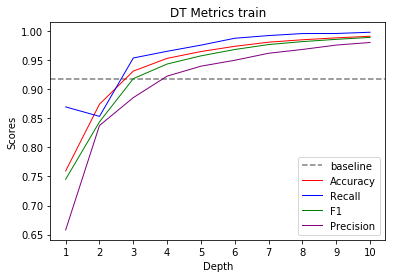

In [159]:
index = np.arange(1,10+1)

fig, ax = plt.subplots()
plt.axhline(baseline['test_acc'], linestyle='--', color='grey', label='baseline')
ax.plot ( index, Accuracy_dt_test, linewidth = 1, color = 'red' , label='Accuracy')
ax.plot ( index, Recall_dt_test, linewidth = 1, color = 'blue',label='Recall')
ax.plot ( index, F1_dt_test, linewidth = 1, color = 'green', label='F1')
ax.plot ( index, Precision_dt_test, linewidth = 1, color = 'purple',label='Precision' )

ax.set_xlabel('Depth')
ax.set_ylabel('Scores')
ax.set_title('DT Metrics test')
ax.set_xticks(index)
ax.legend()

fig, ax1 = plt.subplots()
plt.axhline(baseline['train_acc'], linestyle='--', color='grey', label='baseline')
ax1.plot ( index, Accuracy_dt_train, linewidth = 1, color = 'red' , label='Accuracy')
ax1.plot ( index, Recall_dt_train, linewidth = 1, color = 'blue',label='Recall')
ax1.plot ( index, F1_dt_train, linewidth = 1, color = 'green', label='F1')
ax1.plot ( index, Precision_dt_train, linewidth = 1, color = 'purple',label='Precision' )

ax1.set_xlabel('Depth')
ax1.set_ylabel('Scores')
ax1.set_title('DT Metrics train')
ax1.set_xticks(index)
ax1.legend()

plt.show()

In [122]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc_score = crossValidationScores(dtc)
show_scores(dtc_score)

Training:
 Accuracy:  [0.974]
 Recall:  [0.9879]
 F1:  [0.9685]
 Precision:  [0.95]
Test:
 Accuracy:  [0.9523]
 Recall:  [0.9623]
 F1:  [0.942]
 Precision:  [0.9227]


In [59]:
dtc = DecisionTreeClassifier(max_depth = 9)
dtc_score = crossValidationScores(dtc)
show_scores(dtc_score)

Training:
 Accuracy:  [0.9885]
 Recall:  [0.9966]
 F1:  [0.986]
 Precision:  [0.9756]
Test:
 Accuracy:  [0.951]
 Recall:  [0.9507]
 F1:  [0.9397]
 Precision:  [0.9291]


In [60]:
dtc = DecisionTreeClassifier(max_depth = None)
dtc_score = crossValidationScores(dtc)
show_scores(dtc_score)

Training:
 Accuracy:  [1.]
 Recall:  [1.]
 F1:  [1.]
 Precision:  [1.]
Test:
 Accuracy:  [0.9452]
 Recall:  [0.9361]
 F1:  [0.9323]
 Precision:  [0.9286]


### Support Vector Machines

The SVM performs the separation of a set of objects with different classes, that is, it uses the concept of decision plans. We use here, the evaluation of the model, in different kernel. You can see that the metrics have considerable changes when the kernel changes. 

In [61]:
kernels = ['linear','sigmoid','poly','rbf']
#svc = SVC(probability=True)

Accuracy = []
Recall = []
F1 = []
Precision = [] 

for krn in kernels:
    print ("Kernel:", krn)
    svc = SVC(kernel = krn, gamma = 'auto', probability=True)
    svc_score = crossValidationScores(svc)
    show_scores(svc_score)
    print("\n")

Kernel: linear
Training:
 Accuracy:  [0.9553]
 Recall:  [0.964]
 F1:  [0.9457]
 Precision:  [0.9282]
Test:
 Accuracy:  [0.9517]
 Recall:  [0.9598]
 F1:  [0.9415]
 Precision:  [0.924]


Kernel: sigmoid
Training:
 Accuracy:  [0.8341]
 Recall:  [0.8027]
 F1:  [0.7965]
 Precision:  [0.7904]
Test:
 Accuracy:  [0.8345]
 Recall:  [0.7997]
 F1:  [0.7962]
 Precision:  [0.793]


Kernel: poly
Training:
 Accuracy:  [0.8906]
 Recall:  [0.9831]
 F1:  [0.8791]
 Precision:  [0.7949]
Test:
 Accuracy:  [0.882]
 Recall:  [0.9791]
 F1:  [0.87]
 Precision:  [0.783]


Kernel: rbf
Training:
 Accuracy:  [0.942]
 Recall:  [0.9614]
 F1:  [0.9306]
 Precision:  [0.9018]
Test:
 Accuracy:  [0.9368]
 Recall:  [0.9577]
 F1:  [0.9243]
 Precision:  [0.8934]




#### Scores performed separately for comparison

In [62]:
svc = SVC(kernel = 'linear', gamma = 'auto', probability=True)
svc_score_linear = crossValidationScores(svc)

Accuracy.append(svc_score_linear['test_acc'])
Recall.append(svc_score_linear['test_recall'])
F1.append(svc_score_linear['test_f1'])
Precision.append(svc_score_linear['test_prec'])

In [63]:
svc = SVC(kernel = 'sigmoid', gamma = 'auto', probability=True)
svc_score_sigmoid = crossValidationScores(svc)

Accuracy.append(svc_score_sigmoid['test_acc'])
Recall.append(svc_score_sigmoid['test_recall'])
F1.append(svc_score_sigmoid['test_f1'])
Precision.append(svc_score_sigmoid['test_prec'])

In [64]:
svc = SVC(kernel = 'poly', gamma = 'auto', probability=True)
svc_score_poly = crossValidationScores(svc)

Accuracy.append(svc_score_poly['test_acc'])
Recall.append(svc_score_poly['test_recall'])
F1.append(svc_score_poly['test_f1'])
Precision.append(svc_score_poly['test_prec'])

In [65]:
svc = SVC(kernel = 'rbf', gamma = 'auto', probability=True)
svc_score_rbf = crossValidationScores(svc)

Accuracy.append(svc_score_rbf['test_acc'])
Recall.append(svc_score_rbf['test_recall'])
F1.append(svc_score_rbf['test_f1'])
Precision.append(svc_score_rbf['test_prec'])

#### We can see that the Recall metrics overlap with the other metrics.

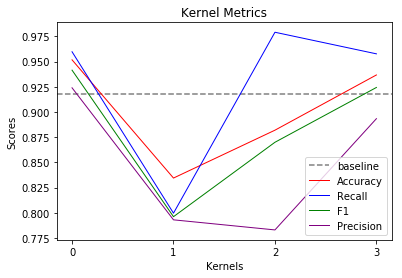

In [118]:
label = ['Linear','Sigmoid','Polinomial','RBF'] 
index = np.arange(len(label))
width = 0.35  # the width of the bars

index = np.arange(len(label))

fig, ax = plt.subplots()
plt.axhline(baseline['test_acc'], linestyle='--', color='grey', label='baseline')
ax.plot ( index, Accuracy, linewidth = 1, color = 'red' , label='Accuracy')
ax.plot ( index, Recall, linewidth = 1, color = 'blue',label='Recall')
ax.plot ( index, F1, linewidth = 1, color = 'green', label='F1')
ax.plot ( index, Precision, linewidth = 1, color = 'purple',label='Precision' )

ax.set_xlabel('Kernels')
ax.set_ylabel('Scores')
ax.set_title('Kernel Metrics')
ax.set_xticks(index)
ax.legend()
plt.show()

In [110]:
dfplot = pd.DataFrame({'Accuracy': Accuracy,'Recall': Recall,'F1':F1, 'Precision': Precision}, index=index)

### k-Nearest Neighbors

O k-NN é um modelo quen realiza a classificação de pontos dados seus k-vizinhos. 

In [142]:
Accuracy_knn_test,Accuracy_knn_train = [],[]
Recall_knn_test,Recall_knn_train = [],[]
F1_knn_test,F1_knn_train = [],[]
Precision_knn_test,Precision_knn_train = [],[]

neighbors = [i for i in range(3, 17+1, 2)]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn_score = crossValidationScores(knn)
    Accuracy_knn_test.append(knn_score['test_acc'])
    Accuracy_knn_train.append(knn_score['train_acc'])
    Recall_knn_test.append(knn_score['test_recall'])
    Recall_knn_train.append(knn_score['train_recall'])
    F1_knn_test.append(knn_score['test_f1'])
    F1_knn_train.append(knn_score['train_f1'])
    Precision_knn_test.append(knn_score['test_prec'])
    Precision_knn_train.append(knn_score['train_prec'])

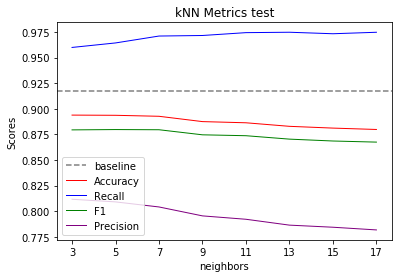

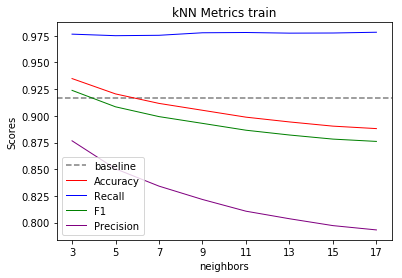

In [165]:
index = neighbors

fig, ax = plt.subplots()
plt.axhline(baseline['test_acc'], linestyle='--', color='grey', label='baseline')
ax.plot ( index, Accuracy_knn_test, linewidth = 1, color = 'red' , label='Accuracy')
ax.plot ( index, Recall_knn_test, linewidth = 1, color = 'blue',label='Recall')
ax.plot ( index, F1_knn_test, linewidth = 1, color = 'green', label='F1')
ax.plot ( index, Precision_knn_test, linewidth = 1, color = 'purple',label='Precision' )

ax.set_xlabel('neighbors')
ax.set_ylabel('Scores')
ax.set_title('kNN Metrics test')
ax.set_xticks(index)
ax.legend()

fig, ax1 = plt.subplots()
plt.axhline(baseline['train_acc'], linestyle='--', color='grey', label='baseline')
ax1.plot ( index, Accuracy_knn_train, linewidth = 1, color = 'red' , label='Accuracy')
ax1.plot ( index, Recall_knn_train, linewidth = 1, color = 'blue',label='Recall')
ax1.plot ( index, F1_knn_train, linewidth = 1, color = 'green', label='F1')
ax1.plot ( index, Precision_knn_train, linewidth = 1, color = 'purple',label='Precision' )

ax1.set_xlabel('neighbors')
ax1.set_ylabel('Scores')
ax1.set_title('kNN Metrics train')
ax1.set_xticks(index)
ax1.legend()

plt.show()

### Random Forest

In [172]:
Accuracy_rfc_test,Accuracy_rfc_train = [],[]
Recall_rfc_test,Recall_rfc_train = [],[]
F1_rfc_test,F1_rfc_train = [],[]
Precision_rfc_test,Precision_rfc_train = [],[]

rf = [i for i in range(1,50+1, 2)]
for n in rf:
    rfc = RandomForestClassifier(n_estimators=n)
    rfc_score = crossValidationScores(rfc)
    Accuracy_rfc_test.append(rfc_score['test_acc'])
    Accuracy_rfc_train.append(rfc_score['train_acc'])
    Recall_rfc_test.append(rfc_score['test_recall'])
    Recall_rfc_train.append(rfc_score['train_recall'])
    F1_rfc_test.append(rfc_score['test_f1'])
    F1_rfc_train.append(rfc_score['train_f1'])
    Precision_rfc_test.append(rfc_score['test_prec'])
    Precision_rfc_train.append(rfc_score['train_prec'])

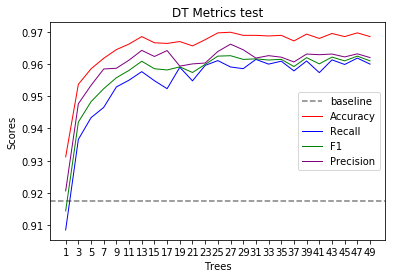

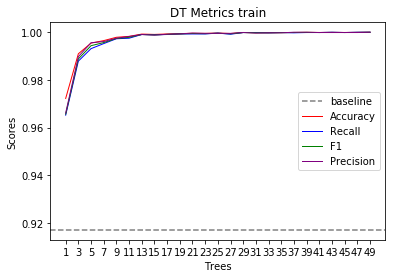

In [174]:
index = rf 

fig, ax = plt.subplots()
plt.axhline(baseline['test_acc'], linestyle='--', color='grey', label='baseline')
ax.plot ( index, Accuracy_rfc_test, linewidth = 1, color = 'red' , label='Accuracy')
ax.plot ( index, Recall_rfc_test, linewidth = 1, color = 'blue',label='Recall')
ax.plot ( index, F1_rfc_test, linewidth = 1, color = 'green', label='F1')
ax.plot ( index, Precision_rfc_test, linewidth = 1, color = 'purple',label='Precision' )

ax.set_xlabel('Trees')
ax.set_ylabel('Scores')
ax.set_title('DT Metrics test')
ax.set_xticks(index)
ax.legend()

fig, ax1 = plt.subplots()
plt.axhline(baseline['train_acc'], linestyle='--', color='grey', label='baseline')
ax1.plot ( index, Accuracy_rfc_train, linewidth = 1, color = 'red' , label='Accuracy')
ax1.plot ( index, Recall_rfc_train, linewidth = 1, color = 'blue',label='Recall')
ax1.plot ( index, F1_rfc_train, linewidth = 1, color = 'green', label='F1')
ax1.plot ( index, Precision_rfc_train, linewidth = 1, color = 'purple',label='Precision' )

ax1.set_xlabel('Trees')
ax1.set_ylabel('Scores')
ax1.set_title('DT Metrics train')
ax1.set_xticks(index)
ax1.legend()

plt.show()

### Gradient Tree Boosting

In [168]:
Accuracy_gb_test,Accuracy_gb_train = [],[]
Recall_gb_test,Recall_gb_train = [],[]
F1_gb_test,F1_gb_train = [],[]
Precision_gb_test,Precision_gb_train = [],[]

gb = [i for i in range(10, 100+1, 10)]
for n_trees in gb:
    gbc = GradientBoostingClassifier(n_estimators = n_trees)
    gbc_score = crossValidationScores(gbc)
    Accuracy_gb_test.append(gbc_score['test_acc'])
    Accuracy_gb_train.append(gbc_score['train_acc'])
    Recall_gb_test.append(gbc_score['test_recall'])
    Recall_gb_train.append(gbc_score['train_recall'])
    F1_gb_test.append(gbc_score['test_f1'])
    F1_gb_train.append(gbc_score['train_f1'])
    Precision_gb_test.append(gbc_score['test_prec'])
    Precision_gb_train.append(gbc_score['train_prec'])

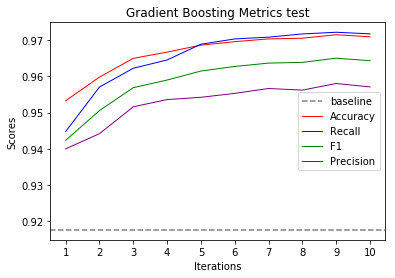

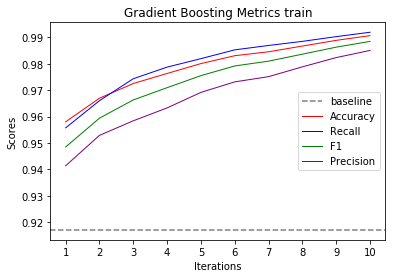

In [173]:
index = np.arange(1,10+1)

fig, ax = plt.subplots()
plt.axhline(baseline['test_acc'], linestyle='--', color='grey', label='baseline')
ax.plot ( index, Accuracy_gb_test, linewidth = 1, color = 'red' , label='Accuracy')
ax.plot ( index, Recall_gb_test, linewidth = 1, color = 'blue',label='Recall')
ax.plot ( index, F1_gb_test, linewidth = 1, color = 'green', label='F1')
ax.plot ( index, Precision_gb_test, linewidth = 1, color = 'purple',label='Precision' )

ax.set_xlabel('Iterations')
ax.set_ylabel('Scores')
ax.set_title('Gradient Boosting Metrics test')
ax.set_xticks(index)
ax.legend()

fig, ax1 = plt.subplots()
plt.axhline(baseline['train_acc'], linestyle='--', color='grey', label='baseline')
ax1.plot ( index, Accuracy_gb_train, linewidth = 1, color = 'red' , label='Accuracy')
ax1.plot ( index, Recall_gb_train, linewidth = 1, color = 'blue',label='Recall')
ax1.plot ( index, F1_gb_train, linewidth = 1, color = 'green', label='F1')
ax1.plot ( index, Precision_gb_train, linewidth = 1, color = 'purple',label='Precision' )

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Scores')
ax1.set_title('Gradient Boosting Metrics train')
ax1.set_xticks(index)
ax1.legend()

plt.show()

### References 
[Train, Test, Split and Cross Validation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)